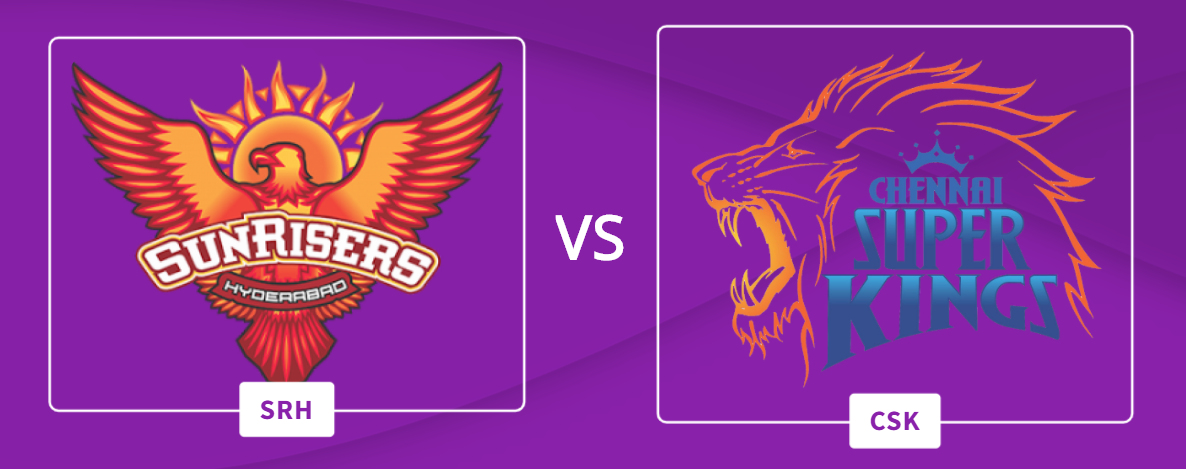

# SRH VS CSK

### SQUADS:

#### Sunrisers Hyderabad

Probable 11
David Warner (C), Jonny Bairstow (wk), Manish Pandey, Kane Williamson, Priyam Garg, Vijay Shankar, Abhishek Sharma, Rashid Khan, Sandeep Sharma, Khaleel Ahmed, T Natarajan

#### Chennai Super Kings

Probable 11
Shane Watson, Faf du Plessis, Ambati Rayudu, N Jagadeesan, MS Dhoni (C & WK), Sam Curran, Ravindra Jadeja, Dwayne Bravo, Deepak Chahar, Shardul Thakur, Karn Sharma

### Venue : Dubai International Cricket Stadium

### Ranking in IPL So far
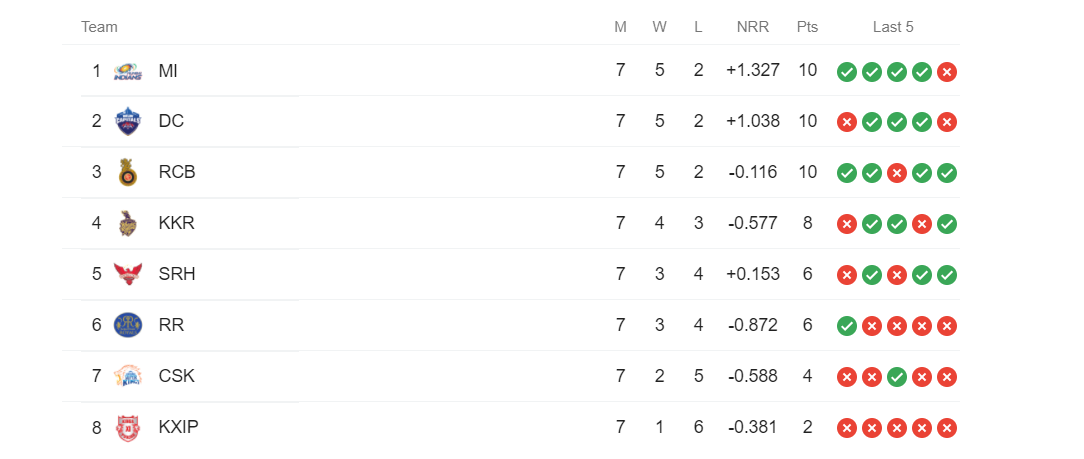

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

pd.set_option('display.max_columns', 50)

In [4]:
matches = pd.read_csv("matches.csv")

In [5]:
# Analysis of Dataset with EDA and some Visualizations
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

#### Checking  unique values

In [7]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [8]:
matches.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [9]:
matches.venue.unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [10]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### Data cleaning

In [11]:
matches.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

###############################################################################################################################

# Part 1 : Who will win the match?

###############################################################################################################################


### One-On-One performance matrix

Text(21.453124999999986, 0.5, 'Game')

<Figure size 432x288 with 0 Axes>

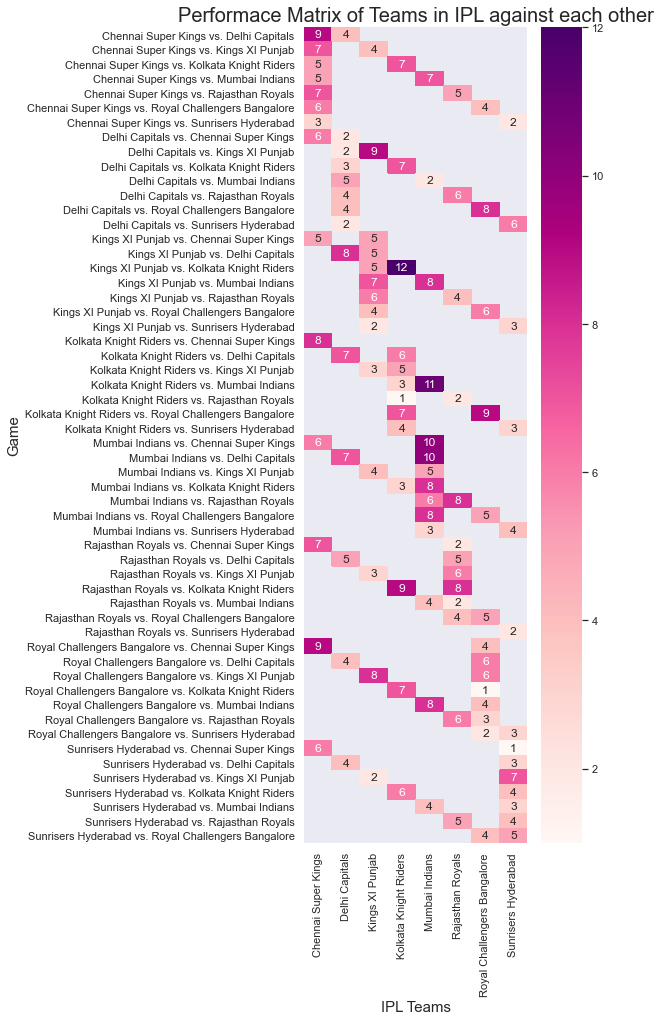

In [13]:
teams_2020=['Chennai Super Kings','Mumbai Indians','Rajasthan Royals','Delhi Capitals','Sunrisers Hyderabad','Kolkata Knight Riders','Royal Challengers Bangalore','Kings XI Punjab']

team_1 = matches[matches.team1.isin(teams_2020)]
team_2 = team_1[team_1.team2.isin(teams_2020)]
teams_ = team_2[team_2.winner.isin(teams_2020)]


face_off_ =teams_.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='win_count')
face_off_['Game'] = face_off_['team1']+' vs. '+face_off_['team2']

heatmap_face_off = pd.pivot_table(face_off_, values='win_count', index=['Game'], columns='winner')

fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))

g = sns.heatmap(heatmap_face_off, annot=True, cmap="RdPu", fmt='g')
ax.set_title('Performace Matrix of Teams in IPL against each other',size=20)
ax.set_xlabel('IPL Teams',size=15)
ax.set_ylabel('Game',size=15)

## SRH Vs CSK

In [28]:
SRH_data = matches[(matches.team1=='Sunrisers Hyderabad') | (matches.team2 =='Sunrisers Hyderabad')] 
CSK_data = matches[(matches.team1 =='Chennai Super Kings') | (matches.team2 =='Chennai Super Kings')] 

In [29]:
SRH_CSK = matches[np.logical_or(np.logical_and(matches['team1']=='Sunrisers Hyderabad',matches['team2']=='Chennai Super Kings'),np.logical_and(matches['team2']=='Sunrisers Hyderabad',matches['team1']=='Chennai Super Kings'))]

## Head to Head performance matrix for SRH and CSK

Text(21.499999999999986, 0.5, 'Game')

<Figure size 432x288 with 0 Axes>

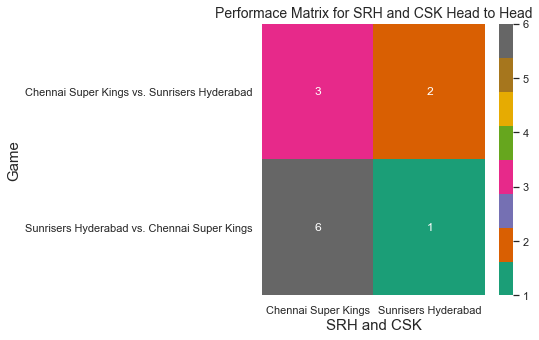

In [39]:
face_off_SC = SRH_CSK.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='win_count')
face_off_SC['Game'] = face_off_SC['team1']+' vs. '+face_off_SC['team2']
heatmap_face_off_SC = pd.pivot_table(face_off_SC, values='win_count', index=['Game'], columns='winner')

fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,5))

g = sns.heatmap(heatmap_face_off_SC, annot=True, cmap="Dark2", fmt='g')
ax.set_title('Performace Matrix for SRH and CSK Head to Head',size=14)
ax.set_xlabel('SRH and CSK',size=15)
ax.set_ylabel('Game',size=15)

In [46]:
win_SC = pd.DataFrame(SRH_CSK['winner'].value_counts())
win_SC['Team_name'] = win_SC.index
win_SC

,winner,Team_name
Chennai Super Kings,9,Chennai Super Kings
Sunrisers Hyderabad,3,Sunrisers Hyderabad


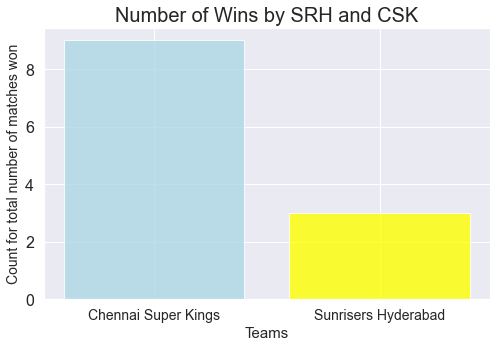

In [50]:
color_ = ['LightBlue', 'Yellow']
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(8,5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.bar(win_SC['Team_name'], win_SC['winner'], color=color_, alpha=0.8)

    
plt.title('Number of Wins by SRH and CSK',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Count for total number of matches won',fontsize=14)
plt.show()

### Hence, out of 12 matches played against each other CSK won 9 whereas SRH won only 3 of them

## Percentage of winning SRH CSK Head to Head

In [58]:
SRH_p = (win_SC.winner[1]/SRH_CSK.shape[0])*100
CSK_p = (win_SC.winner[0]/SRH_CSK.shape[0])*100
print("Winning percentage of SRH against CSK is: ",SRH_p,"\nWinning percentage of CSK against SRH is: ", CSK_p)

Winning percentage of SRH against CSK is:  25.0 
Winning percentage of CSK against SRH is:  75.0


## Overall Percentage of winning SRH and CSK in IPL according to this dataset

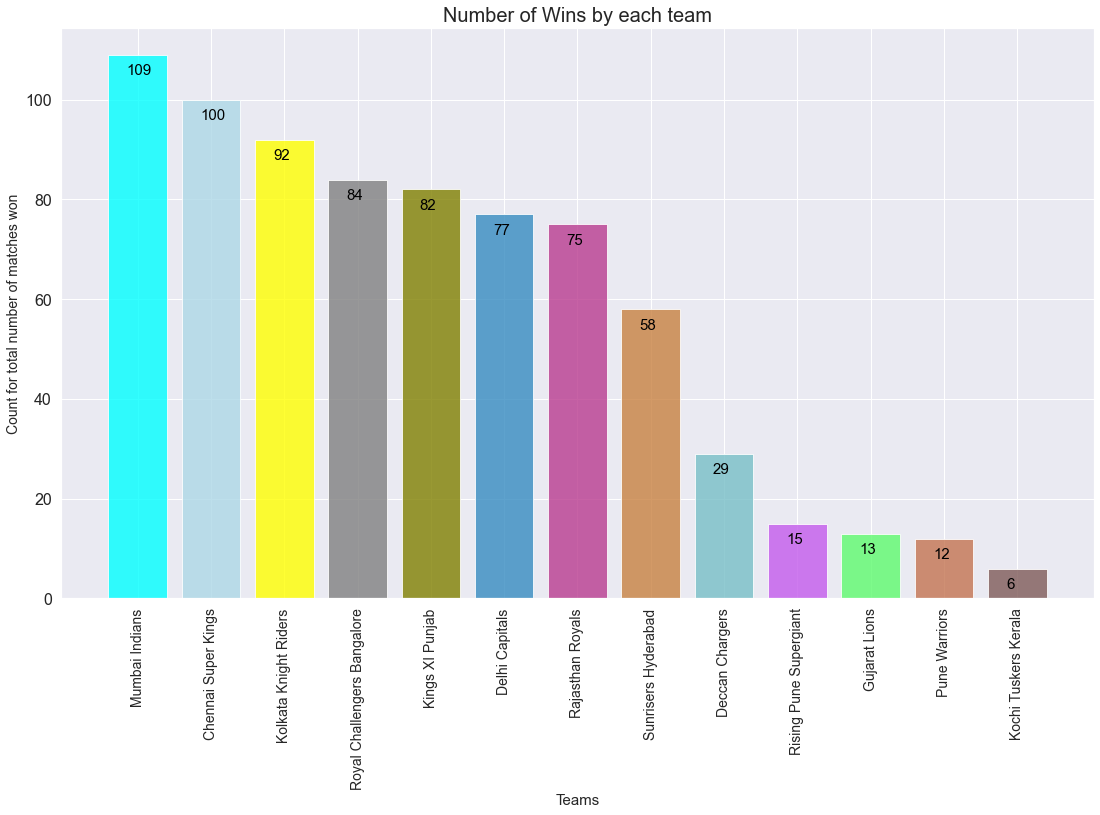

In [61]:
win_count = pd.DataFrame(matches['winner'].value_counts())
win_count['Team_name']=win_count.index
color_code = ['cyan', 'LightBlue', 'Yellow', 'Grey', 'Olive', '#368BC1', '#B93B8F', '#C88141', '#77BFC7', '#C45AEC', '#5EFB6E',
             '#C47451', '#7F5A58','#F6358A','#842DCE']
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)

plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.bar(win_count['Team_name'], win_count['winner'], color=color_code, alpha=0.8)


for count, i in enumerate(win_count['winner'],0):
    plt.text(count-0.15,i-4,str(i),size=15,color='black')
    
plt.title('Number of Wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Count for total number of matches won',fontsize=14)
plt.show()

#### SRH won total 58 matches whereas, CSK won 100 matches

In [63]:
# Percentage of winning SRH
print("Overall winning percentage of SRH is :", (58/SRH_data.shape[0])*100)

# Percentage of winning CSK
print("Overall winning percentage of CSK is :", (100/CSK_data.shape[0])*100)
      

Overall winning percentage of SRH is : 53.70370370370371
Overall winning percentage of CSK is : 60.97560975609756


### So far, CSK seems to be leading but we have to take other factors into account such as venue and the performances of  players

## Venue wise Analysis
## Venue for SRH Vs CSK is Dubai International Cricket Stadium

In [69]:
venues = pd.DataFrame(matches['venue'].value_counts())
venues['name'] = matches['venue'].value_counts().index

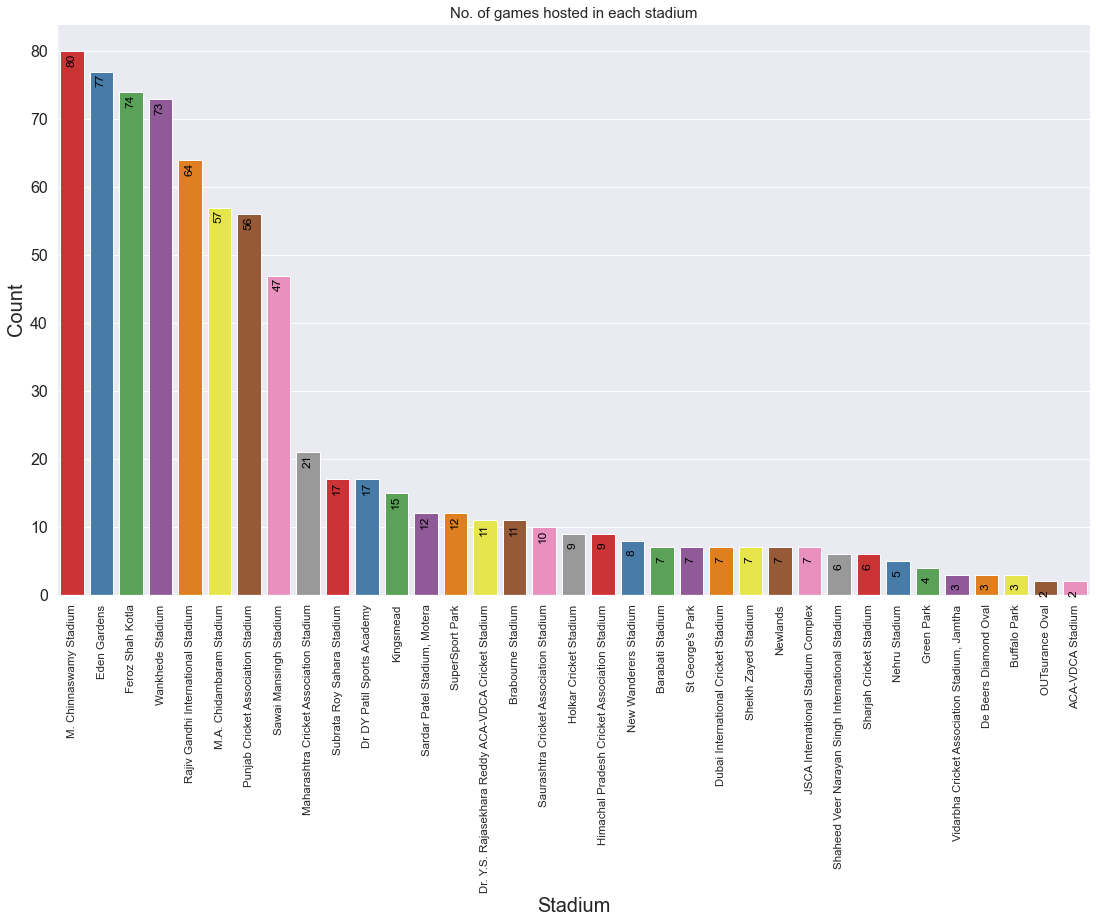

In [68]:
# Number of matches hosted at each stadium
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.countplot(matches['venue'],order = matches['venue'].value_counts().index,palette='Set1')
plt.xticks(rotation=90,fontsize=11.5)
plt.yticks(fontsize=16)
plt.xlabel('Stadium',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each stadium',fontsize=15)

for count,i in enumerate(venues['venue'],0):
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)

plt.show()

#### Number of matches hosted at Dubai International cricket stadium are 7

## Matches played by SRH at Dubai Stadium

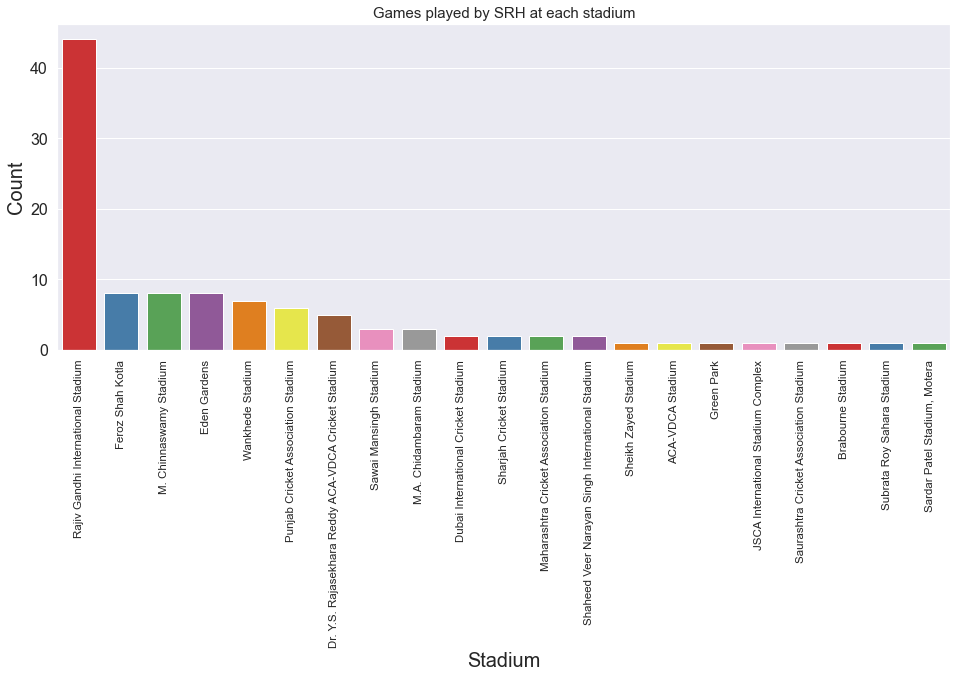

In [95]:
venues_S = pd.DataFrame(SRH_data['venue'].value_counts())
venues_S['name'] = SRH_data['venue'].value_counts().index

fig = plt.gcf()
fig.set_size_inches(16,6)
sns.countplot(SRH_data['venue'],order = SRH_data['venue'].value_counts().index,palette='Set1')
plt.xticks(rotation=90,fontsize=11.5)
plt.yticks(fontsize=16)
plt.xlabel('Stadium',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Games played by SRH at each stadium',fontsize=15)

plt.show()

#### SRH played at Dubai Stadium twice

### SRH winning statistics Stadium wise

Text(0.5, 1.0, 'Wins at the Venues')

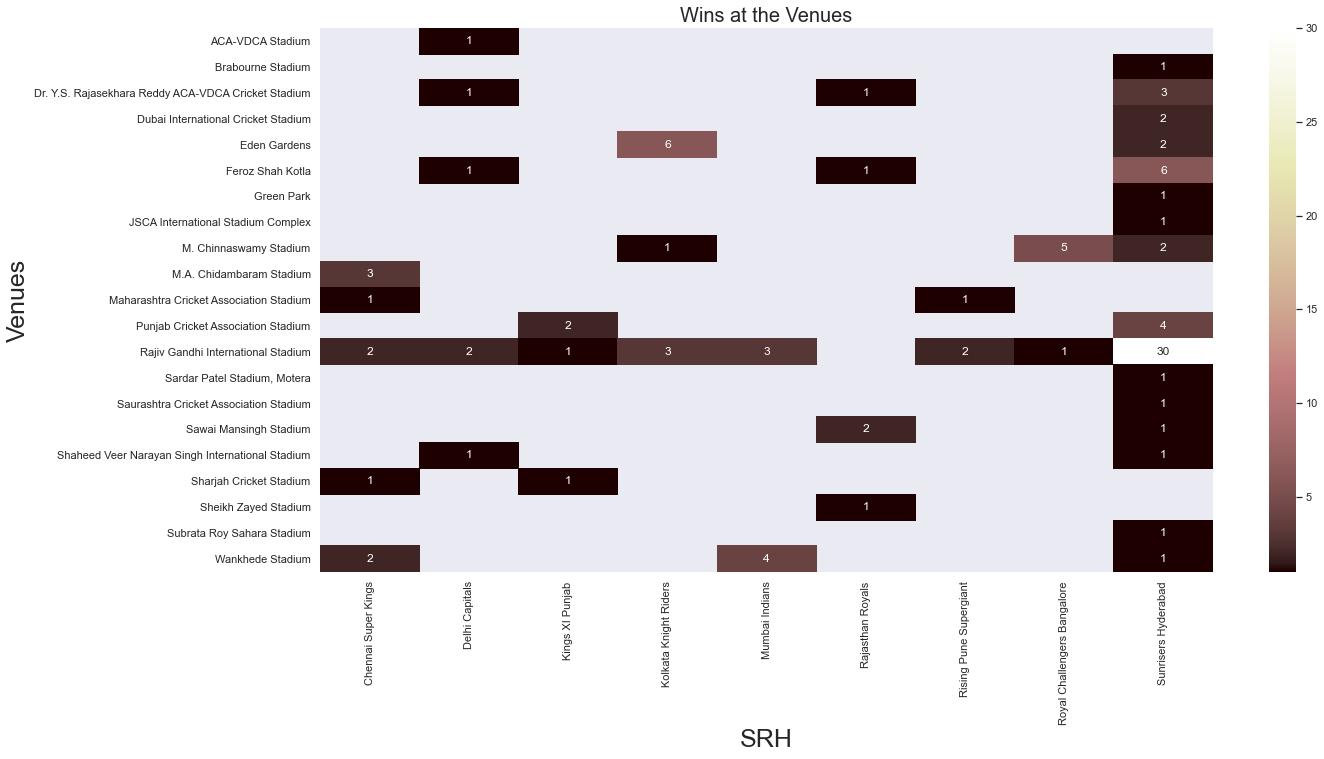

In [94]:
win_S = SRH_data.groupby(['venue','winner']).apply(lambda x:x['winner'].count()).reset_index(name='win_count')

# transform the dataset
win_S_ = pd.pivot(win_S,values='win_count',index='venue',columns='winner')
win_S_.replace(np.NaN,0)

plt.figure(figsize=(20,10))

htmp=sns.heatmap(win_S_,annot=True,fmt='g',cmap='pink')

plt.xlabel('SRH',size=25)
plt.ylabel('Venues',size=25)
plt.title('Wins at the Venues',size=20)

In [92]:
win_S1 = SRH_data.groupby(['venue','team1','team2','toss_winner',"toss_decision",'win_by_runs','win_by_wickets','winner']).apply(lambda x:x['winner'].count()).reset_index(name='win_count')

win_S1[win_S1.venue == "Dubai International Cricket Stadium"]

,venue,team1,team2,toss_winner,toss_decision,win_by_runs,win_by_wickets,winner,win_count
7,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,4,0,Sunrisers Hyderabad,1
8,Dubai International Cricket Stadium,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,15,0,Sunrisers Hyderabad,1


#### SRH played 2 games at Dubai Stadium and won both by 4 and 15 runs.


## Matches played by CSK at Dubai Stadium

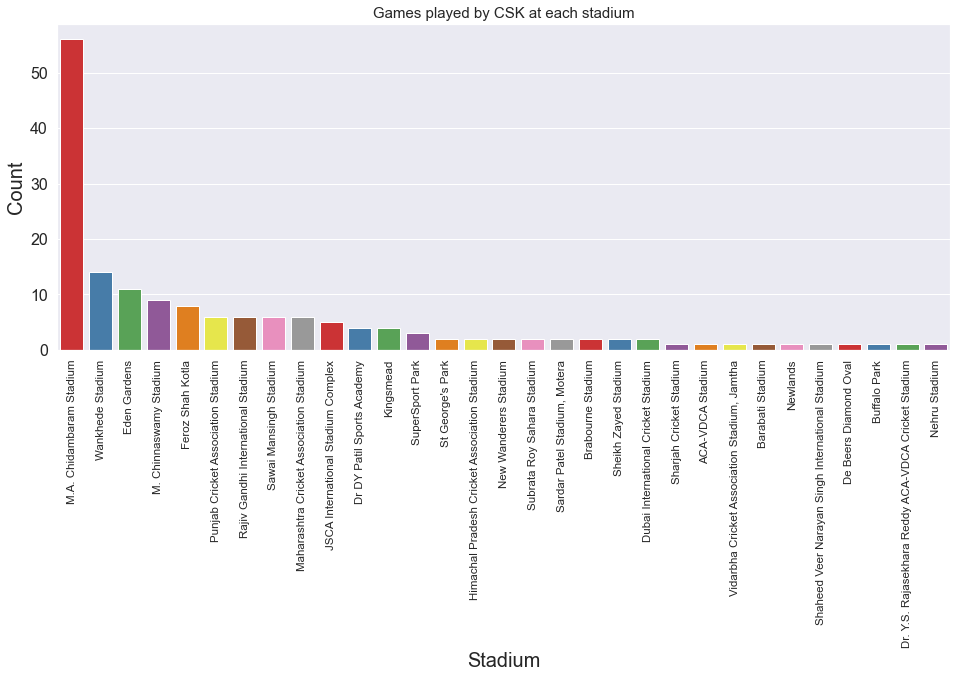

In [96]:
venues_C = pd.DataFrame(CSK_data['venue'].value_counts())
venues_C['name'] = CSK_data['venue'].value_counts().index

fig = plt.gcf()
fig.set_size_inches(16,6)
sns.countplot(CSK_data['venue'],order = CSK_data['venue'].value_counts().index,palette='Set1')
plt.xticks(rotation=90,fontsize=11.5)
plt.yticks(fontsize=16)
plt.xlabel('Stadium',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Games played by CSK at each stadium',fontsize=15)

plt.show()

#### CSK also played twice at Dubai Stadium

Text(0.5, 1.0, 'Wins at the Venues')

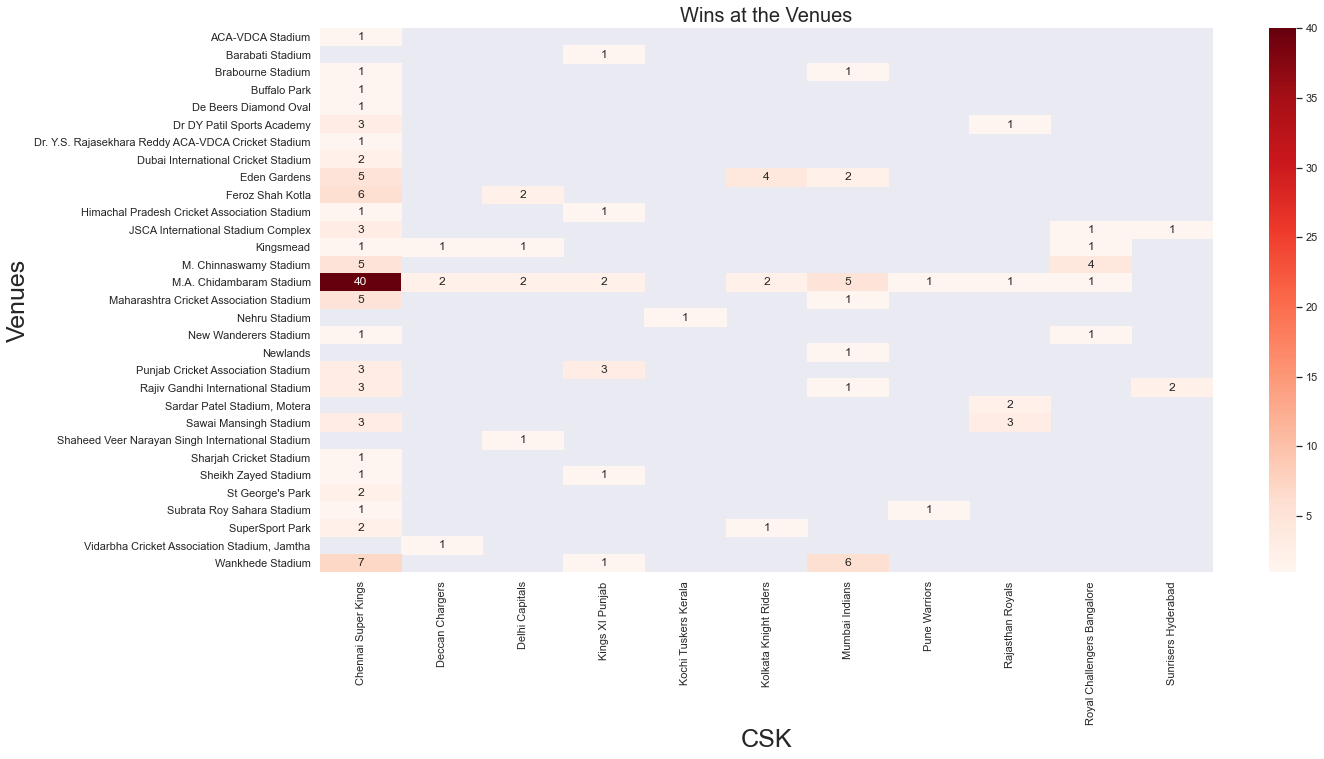

In [100]:
win_C = CSK_data.groupby(['venue','winner']).apply(lambda x:x['winner'].count()).reset_index(name='win_count')

# transform the dataset
win_C_ = pd.pivot(win_C,values='win_count',index='venue',columns='winner')
win_C_.replace(np.NaN,0)

plt.figure(figsize=(20,10))

htmp=sns.heatmap(win_C_,annot=True,fmt='g',cmap='Reds')

plt.xlabel('CSK',size=25)
plt.ylabel('Venues',size=25)
plt.title('Wins at the Venues',size=20)

In [101]:
win_C1 = CSK_data.groupby(['venue','team1','team2','toss_winner',"toss_decision",'win_by_runs','win_by_wickets','winner']).apply(lambda x:x['winner'].count()).reset_index(name='win_count')

win_C1[win_C1.venue == "Dubai International Cricket Stadium"]

,venue,team1,team2,toss_winner,toss_decision,win_by_runs,win_by_wickets,winner,win_count
11,Dubai International Cricket Stadium,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,7,0,Chennai Super Kings,1
12,Dubai International Cricket Stadium,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,0,7,Chennai Super Kings,1


#### CSK also won both the matches played at Dubai Stadium.

## Pitch Analysis
According to Experts, Dubai pitch is likely to help pacers in the initial stage and spinners will hold the key in the middle overs. Dew factor will play a key role.
The pitch in Dubai has supported the batsmen and fast bowlers.


In [105]:
pitch = matches[matches.venue == "Dubai International Cricket Stadium"]

### Effect of Toss Decision

### Toss Decisions taken at Dubai Stadium

(array([0.5]), <a list of 1 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

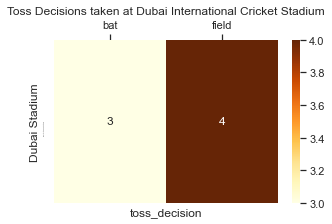

In [146]:
toss_v = pitch.groupby(['venue','toss_decision']).apply(lambda x:x['toss_decision'].count()).reset_index(name='toss_decision_count')
# Transform dataset
heatmap_toss_v = pd.pivot_table(toss_v, values='toss_decision_count', index=['venue'], columns='toss_decision')

# Plot heatmap
fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(5,3))

g = sns.heatmap(heatmap_toss_v, annot=True, cmap="YlOrBr", fmt='g')

g.xaxis.set_ticks_position("top")
g.set_ylabel('Dubai Stadium',size=12)

ax.set_title('Toss Decisions taken at Dubai International Cricket Stadium',size=12)
plt.yticks(size =0)

### Impact of toss decision on winning and loosing

In [130]:
impact_v_t = pitch.groupby(['venue','toss_decision']).apply(lambda x:np.sum(np.where(x['toss_winner']==x['winner'],1,0))).reset_index(name='toss_winner_is_match_winner')
# lets merge toss venue decision data (toss_v)
merged_v = pd.merge(impact_v_t, toss_v, how='inner', left_on=['venue','toss_decision'], right_on=['venue','toss_decision'])

# Calculate toss_winner_is_match_looser
merged_v['toss_winner_is_match_looser'] = merged_v['toss_decision_count']-merged_v['toss_winner_is_match_winner']

In [131]:
merged_v

,venue,toss_decision,toss_winner_is_match_winner,toss_decision_count,toss_winner_is_match_looser
0,Dubai International Cricket Stadium,bat,1,3,2
1,Dubai International Cricket Stadium,field,2,4,2


(array([0.5]), <a list of 1 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

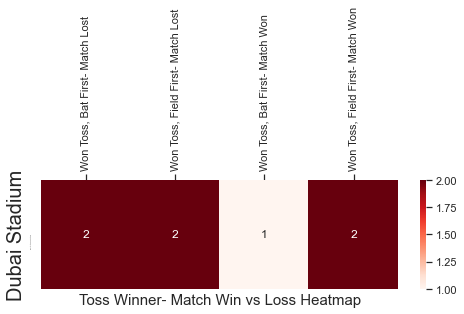

In [139]:
# Heatmap for above analysis
heatmap_impact_v_t = pd.pivot_table(merged_v, values=['toss_winner_is_match_winner','toss_winner_is_match_looser'], index=['venue'], 
                     columns='toss_decision')

fig=plt.figure()
fig,ax1=plt.subplots(1,1,figsize=(8,2))
g=sns.heatmap(heatmap_impact_v_t, annot=True, cmap='Reds', fmt='g')

g.xaxis.set_ticks_position("top")
g.set_xticklabels(['Won Toss, Bat First- Match Lost','Won Toss, Field First- Match Lost','Won Toss, Bat First- Match Won','Won Toss, Field First- Match Won'],rotation=90)
g.set_xlabel('Toss Winner- Match Win vs Loss Heatmap',size=15)
g.set_ylabel('Dubai Stadium',size=20)
plt.yticks(size =0)

### From above plot it is evident that more number of matches won by team batting second.

### Players Analysis of Both the teams

## SRH Players' Analysis

#### Sunrisers Hyderabad(Probable 11)

##### Batsmen:  David Warner (C), Jonny Bairstow (wk), Kane Williamson, Manish Pandey,  Priyam Garg, Abhishek Sharma,

##### Allrounder: Vijay Shankar  

##### Bowlers:  Rashid Khan(spinner), Sandeep Sharma, Khaleel Ahmed, T Natarajan

Pitch Demands fast Bowlers and Spinners and SRH has a right combination which would surpass all the previous numbers.
They have also shown this capability in previous match with CSK where CSK lost by 7 Runs.
Hence, Giving more importance to players performance is evidential and crucial here.

In [226]:
players = pd.read_csv("deliveries.csv")
#players.batting_team.unique()
temp = players[players.batting_team == 'Kings XI Punjab']
temp.batsman.unique()

array(['HM Amla', 'M Vohra', 'WP Saha', 'AR Patel', 'GJ Maxwell',
       'DA Miller', 'MP Stoinis', 'MM Sharma', 'VR Aaron', 'EJG Morgan',
       'KC Cariappa', 'Sandeep Sharma', 'I Sharma', 'SE Marsh',
       'MJ Guptill', 'Anureet Singh', 'Swapnil Singh', 'R Tewatia',
       'K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'DPMD Jayawardene', 'S Sohal', 'B Lee', 'PP Chawla',
       'WA Mota', 'RR Sarwan', 'S Sreesanth', 'VRV Singh',
       'TM Srivastava', 'U Kaul', 'LA Pomersbach', 'RR Powar',
       'RS Bopara', 'T Kohli', 'MS Bisla', 'M Kaif', 'YA Abdulla',
       'AB Barath', 'Bipul Sharma', 'J Theron', 'SJ Srivastava',
       'VS Malik', 'RS Sodhi', 'AC Gilchrist', 'PC Valthaty',
       'KD Karthik', 'AM Nayar', 'Sunny Singh', 'R McLaren', 'P Kumar',
       'NJ Rimmington', 'DJ Hussey', 'RJ Harris', 'L Ablish',
       'Mandeep Singh', 'SD Chitnis', 'BA Bhatt', 'JP Faulkner',
       'Harmeet Singh', 'AD Mascarenhas', 'P Dogra', 'N Saini',
  

## Inningwise performances of SRH batsmen

In [213]:
batsman_list_req = ['DA Warner', 'J Bairstow', 'KS Williamson', 'MK Pandey', 'V Shankar']

batsman = players[players.batsman.isin(batsman_list_req)]
batsman_run=batsman.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')


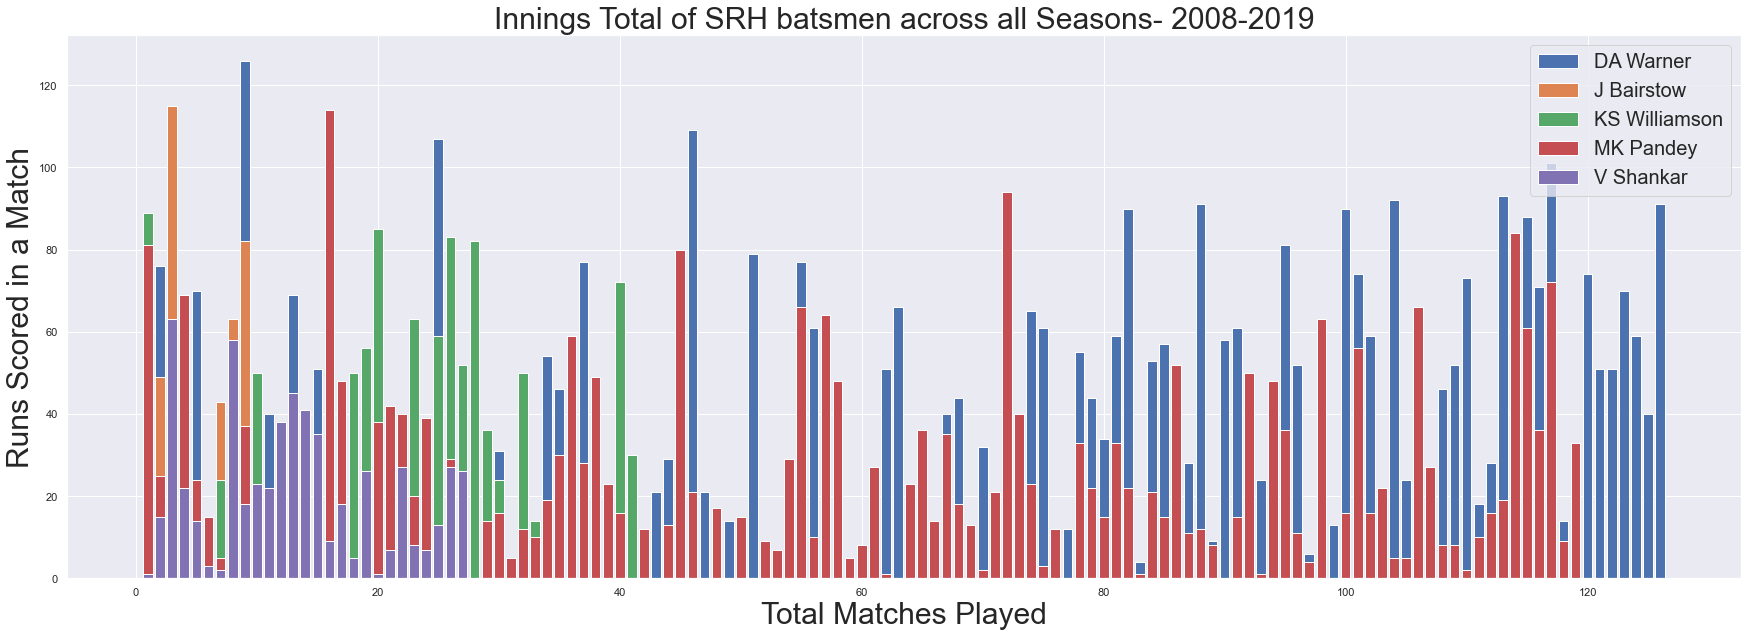

In [214]:
#bat_list=batsman.batsman.unique()
plt.figure(figsize=(30,10))
for name in batsman_list_req:
    batsman_check=batsman_run[batsman_run.batsman==name]
    batsman_check.index = np.arange(1, len(batsman_check) + 1)
    x=batsman_check.index
    y=batsman_check.Runs
    plt.bar(x,y)
plt.legend(batsman_list_req,prop={'size':20})
plt.title("Innings Total of SRH batsmen across all Seasons- 2008-2019",fontsize= 30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Runs Scored in a Match",fontsize=30)
plt.show()

In [215]:
batsman_run_DW = batsman_run[batsman_run.batsman == "DA Warner"]
batsman_run_JB = batsman_run[batsman_run.batsman == "J Bairstow"]
batsman_run_KW = batsman_run[batsman_run.batsman == "KS Williamson"]
batsman_run_MP = batsman_run[batsman_run.batsman == "MK Pandey"]
batsman_run_VS = batsman_run[batsman_run.batsman == "V Shankar"]

### Average scores in innings by SRH players:


In [216]:
print("DA Warner: ", batsman_run_DW.Runs.values.mean(), "\nJ Bairstow: ", batsman_run_JB.Runs.values.mean(), "\nKS Williamson: ", batsman_run_KW.Runs.values.mean(), 
      "\nMK Pandey: ",batsman_run_MP.Runs.values.mean(), "\nV Shankar: ",batsman_run_VS.Runs.values.mean())

DA Warner:  37.62698412698413 
J Bairstow:  46.8 
KS Williamson:  32.170731707317074 
MK Pandey:  24.134453781512605 
V Shankar:  21.25925925925926


In [217]:
# detailed analysis
batting_ings = batsman.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted =batting_ings.sort_values(by='Innings Runs',ascending=False)

In [218]:
top_scores=batting_ings_sorted[:-1]
batsman_ball_faced=batsman.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')

batsmen_performance=pd.merge(top_scores,batsman_ball_faced,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']

batsmen_innings=pd.merge(batsmen_performance,batsman,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings=batsmen_innings_req.drop_duplicates()

#print('Batting Performances by SRH in the IPL are:\n',batsmen_innings)


## Average Strike Rates for SRH batsmen

In [219]:
SR_DW = batsmen_innings[batsmen_innings.batsman == "DA Warner"]
SR_JB = batsmen_innings[batsmen_innings.batsman == "J Bairstow"]
SR_KW = batsmen_innings[batsmen_innings.batsman == "KS Williamson"]
SR_MP = batsmen_innings[batsmen_innings.batsman == "MK Pandey"]
SR_VS = batsmen_innings[batsmen_innings.batsman == "V Shankar"]


In [220]:
print("DA Warner: ",SR_DW["Strike Rate for Match"].values.mean(), "\nJ Bairstow: ", SR_JB["Strike Rate for Match"].values.mean(), "\nKS Williamson: ", 
      SR_KW["Strike Rate for Match"].values.mean(), "\nMK Pandey: ", SR_MP["Strike Rate for Match"].values.mean(),
     "\nV Shankar: ", SR_VS["Strike Rate for Match"].values.mean())

DA Warner:  120.29318265030611 
J Bairstow:  134.95322678572992 
KS Williamson:  121.45708495408769 
MK Pandey:  102.83179513770646 
V Shankar:  131.80925507515687


## Bowlers of SRH

In [263]:
bowlers_list = ['Sandeep Sharma', 'K Ahmed', 'Rashid Khan', 'V Shankar']
bowlers = players[players.bowler.isin(bowlers_list)]

In [264]:
bowling_wickets=bowlers[bowlers['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()


In [306]:
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 

print("SRH Bowlers' Wicket count in IPL:\n",top_bowlers)
fig = px.bar(top_bowlers, x='bowler', y='Wickets',
             hover_data=['bowler'], color='Wickets',title='Wickets taken By SRH Bowlers in IPL')
fig.show()

SRH Bowlers' Wicket count in IPL:
            bowler  Wickets
2  Sandeep Sharma       83
1     Rashid Khan       55
0         K Ahmed       20
3       V Shankar        2


## Fielding performances by SRH

In [266]:
fielders_SRH = ['DA Warner', 'J Bairstow', 'KS Williamson', 'MK Pandey', 'V Shankar', 'Sandeep Sharma', 'K Ahmed', 'Rashid Khan']

fielders_S = players[players.fielder.isin(fielders_SRH)]

In [267]:
#Creating a list of the best fielders- Considering Catch,Run Out and Stumpings
fielder_list=fielders_S.groupby('fielder').apply(lambda x:x).dropna().reset_index()
fielder_list_count=fielder_list.groupby('fielder').count()
fielder_list_counts=fielder_list_count['dismissal_kind'].reset_index(name='Dismissals')
fielder_list_max=fielder_list_counts.sort_values(by='Dismissals',ascending=False)
print('Fielders of SRH \n',fielder_list_max)

Fielders of SRH 
           fielder  Dismissals
3       MK Pandey          77
0       DA Warner          62
6       V Shankar          21
4     Rashid Khan          20
2   KS Williamson          19
1      J Bairstow          11
5  Sandeep Sharma          10


In [268]:
fig = px.bar(fielder_list_max, x='fielder', y='Dismissals',
             hover_data=['fielder'], color='Dismissals',title='SRH Fielders in IPL')
fig.show()

## Economy of bowlers : SRH

In [269]:
#let' consider ball limit to be 1000 in case of ballers
Ball_Limit= 50
bowling_runs=bowlers.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls=bowlers.groupby('bowler').count()
bowled_balls=bowling_balls['ball'].reset_index(name='Balls Bowled')
bowled_balls
bowler_stats=pd.merge(bowling_runs,bowled_balls,left_on='bowler',right_on='bowler',how='outer')

bowler_economy_rate=bowler_stats.groupby(['bowler','Balls Bowled']).apply(lambda x:(((x['Runs Conceeded'])/(x['Balls Bowled']))*6)).reset_index(name='Economy Rate')

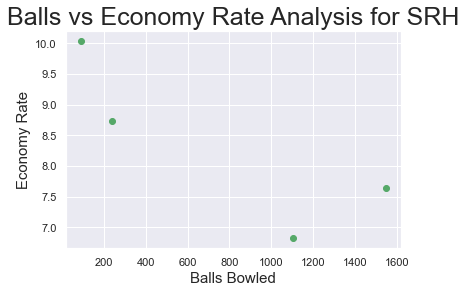

In [270]:
plt.scatter(bowler_economy_rate['Balls Bowled'],bowler_economy_rate['Economy Rate'],color='g')
plt.xlabel('Balls Bowled',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('Balls vs Economy Rate Analysis for SRH',size=25)
plt.show()

SRH Bowlers having best economy rate, bowling atleast 50 balls:
            bowler  Balls Bowled  Economy Rate
1     Rashid Khan          1106      6.819168
2  Sandeep Sharma          1546      7.633894
0         K Ahmed           241      8.738589
3       V Shankar            92     10.043478


([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

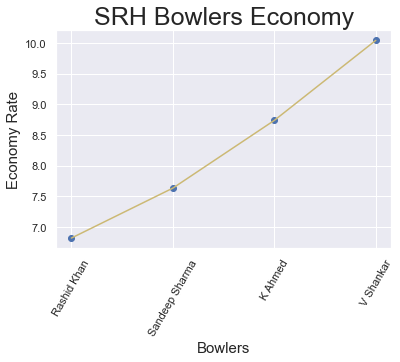

In [271]:

bowler_best_economy_rate=bowler_economy_rate.sort_values(by='Economy Rate',ascending=True)
bowler_best_economy_rate_condition=bowler_best_economy_rate[bowler_best_economy_rate['Balls Bowled']>=Ball_Limit]
top_10_economy=bowler_best_economy_rate_condition.loc[:,['bowler','Balls Bowled','Economy Rate']][0:10]

print('SRH Bowlers having best economy rate, bowling atleast {} balls:\n'.format(Ball_Limit),top_10_economy)

plt.plot(top_10_economy['bowler'],top_10_economy['Economy Rate'],color='y')
plt.scatter(top_10_economy['bowler'],top_10_economy['Economy Rate'],color='b')
plt.xlabel('Bowlers',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('SRH Bowlers Economy',size=25)
plt.xticks(rotation=60)

### CSK Team Analysis

### Players Analysis of Both the teams

## CSK Players' Analysis

#### Chennai Superkings(Probable 11)
##### Batsmen:    Shane Watson, Faf du Plessis, Ambati Rayudu, Faf du Plessis, MS Dhoni (c), N Jagadeesan

##### Allrounder: Shane Watson, Dwayne Bravo, Karn Sharma, Sam Curran

##### Bowlers:  Ravindra Jadeja, Deepak Chahar, Shardul Thakur, D Bravo, Sam Curran, Karn Sharma
##### Wicketkeepers: MS Dhoni (c), N Jagadeesan

CSK has a very good opening batsmen same as SRH, CSK has best death bowlers such as DJ Bravo, Chahar (swing bowler). and has a best fielder like R Jadeja, and best finisher MS Dhoni , Ambati Rayadu anchors the inning in the moddle overs which makes them equally compatible with SRH.

In [308]:
## Inningwise performances of CSK batsmen

batsman_list_req_ = ['F du Plessis', 'SR Watson' , 'AT Rayudu', 'MS Dhoni', 'DJ Bravo', 'RA Jadeja']

batsman_ = players[players.batsman.isin(batsman_list_req_)]
batsman_run_ = batsman_.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')

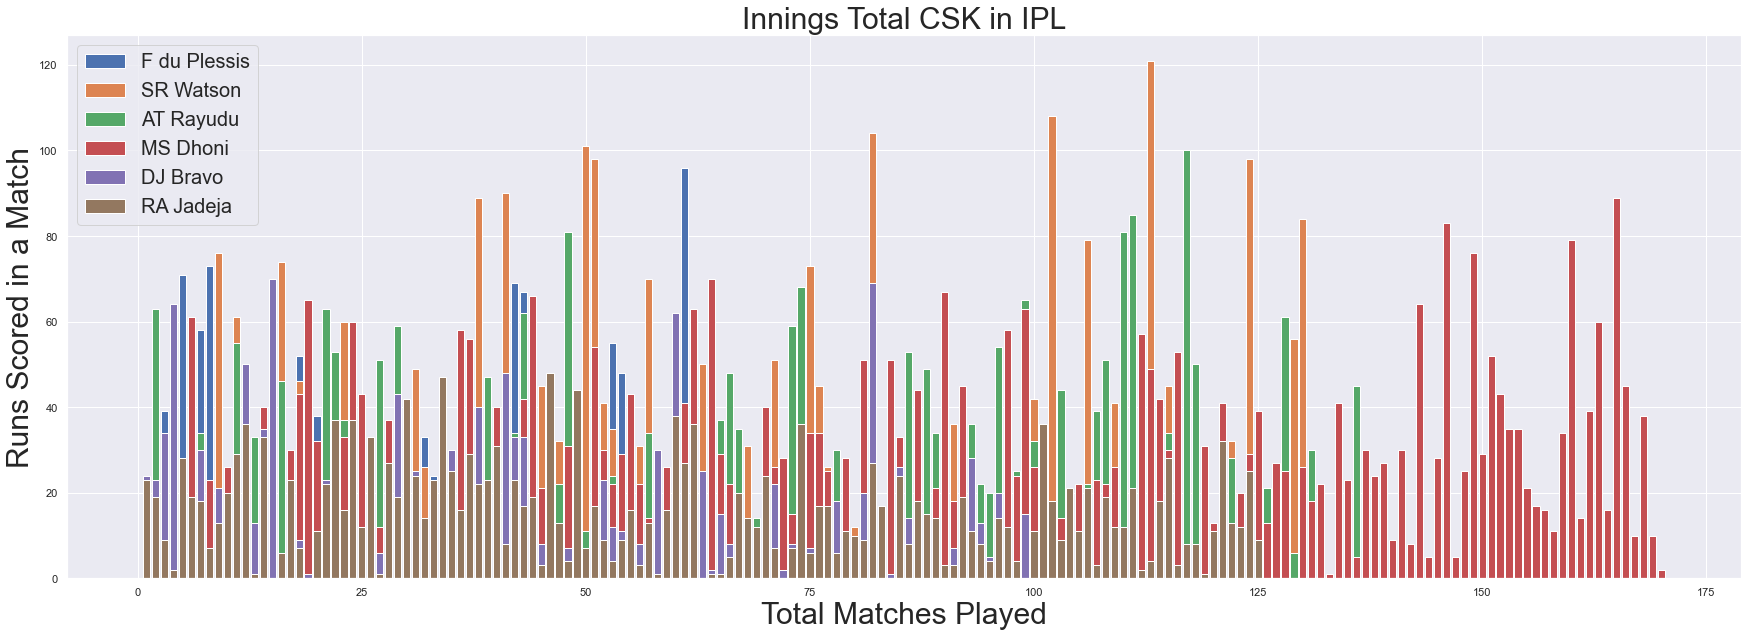

In [309]:
#bat_list=batsman.batsman.unique()
plt.figure(figsize=(30,10))
for name in batsman_list_req_:
    batsman_check_=batsman_run_[batsman_run_.batsman==name]
    batsman_check_.index = np.arange(1, len(batsman_check_) + 1)
    x=batsman_check_.index
    y=batsman_check_.Runs
    plt.bar(x,y)
plt.legend(batsman_list_req_,prop={'size':20})
plt.title("Innings Total CSK in IPL",fontsize= 30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Runs Scored in a Match",fontsize=30)
plt.show()

In [310]:
batsman_run_1 = batsman_run_[batsman_run_.batsman == 'F du Plessis']
batsman_run_2 = batsman_run_[batsman_run_.batsman == 'SR Watson']
batsman_run_3 = batsman_run_[batsman_run_.batsman == 'AT Rayudu']
batsman_run_4 = batsman_run_[batsman_run_.batsman == 'MS Dhoni']
batsman_run_5 = batsman_run_[batsman_run_.batsman == 'DJ Bravo']
batsman_run_6 = batsman_run_[batsman_run_.batsman == 'RA Jadeja']

### Average scores in innings by CSK players:

In [311]:
print("F du Plessis: ", batsman_run_1.Runs.values.mean(), "\nSR Watson: ", batsman_run_2.Runs.values.mean(),
      "\nAT Rayudu: ", batsman_run_3.Runs.values.mean(), "\nMS Dhoni: ",batsman_run_4.Runs.values.mean(), 
      "\nDJ Bravo: ",batsman_run_5.Runs.values.mean(), "\nRA Jadeja: ",batsman_run_6.Runs.values.mean())

F du Plessis:  29.28125 
SR Watson:  27.8 
AT Rayudu:  24.10144927536232 
MS Dhoni:  26.33529411764706 
DJ Bravo:  15.131313131313131 
RA Jadeja:  15.608


In [312]:
# detailed analysis
batting_ings_ = batsman_.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted_ =batting_ings_.sort_values(by='Innings Runs',ascending=False)

top_scores_=batting_ings_sorted_[:-1]
batsman_ball_faced_=batsman_.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')

batsmen_performance_=pd.merge(top_scores_,batsman_ball_faced_,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance_['Strike Rate for Match']=batsmen_performance_['Innings Runs']*100/batsmen_performance_['Balls Faced']

batsmen_innings_=pd.merge(batsmen_performance_,batsman_,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_req_= batsmen_innings_.iloc[:,1:8]
batsmen_innings_=batsmen_innings_req_.drop_duplicates()


### Average Strike Rates for SRH batsmen

In [313]:
SR_1 = batsmen_innings_[batsmen_innings_.batsman == "F du Plessis"]
SR_2 = batsmen_innings_[batsmen_innings_.batsman == "SR Watson"]
SR_3 = batsmen_innings_[batsmen_innings_.batsman == "AT Rayudu"]
SR_4 = batsmen_innings_[batsmen_innings_.batsman == "MS Dhoni"]
SR_5 = batsmen_innings_[batsmen_innings_.batsman == "DJ Bravo"]
SR_6 = batsmen_innings_[batsmen_innings_.batsman == "RA Jadeja"]

In [314]:
print("F du Plessis: ",SR_1["Strike Rate for Match"].values.mean(), "\nJSR Watson: ", SR_2["Strike Rate for Match"].values.mean(), "\nAT Rayudu: ", 
      SR_3["Strike Rate for Match"].values.mean(), "\nMS Dhoni: ", SR_4["Strike Rate for Match"].values.mean(),
     "\nDJ Bravo: ", SR_5["Strike Rate for Match"].values.mean(),"\nRA Jadeja:", SR_6["Strike Rate for Match"].values.mean())

F du Plessis:  113.96123723406741 
JSR Watson:  117.93704916487809 
AT Rayudu:  111.74373372890851 
MS Dhoni:  126.81129852184247 
DJ Bravo:  131.82567351763345 
RA Jadeja: 121.6825926388579


## Bowlers of CSK

In [315]:
bowlers_list_ = ['DJ Bravo', 'RA Jadeja', 'DL Chahar', 'SN Thakur', 'KV Sharma', 'S Curran']
bowlers_ = players[players.bowler.isin(bowlers_list_)]

bowling_wickets_ = bowlers_[bowlers_['dismissal_kind']!='run out']
bowling_tot_ = bowling_wickets_.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count_ = bowling_tot_.groupby('bowler').count().reset_index()


bowling_top_ = bowling_wick_count_.sort_values(by='Wickets',ascending=False)
top_bowlers_ = bowling_top_.loc[:,['bowler','Wickets']][0:10] 

print("CSK bowlers' wicket counts:\n",top_bowlers_)
fig = px.bar(top_bowlers_, x='bowler', y='Wickets',
             hover_data=['bowler'], color='Wickets',title='Wickets taken By SRH Bowlers in IPL')
fig.show()



CSK bowlers' wicket counts:
       bowler  Wickets
0   DJ Bravo      147
3  RA Jadeja      108
2  KV Sharma       55
5  SN Thakur       36
1  DL Chahar       33
4   S Curran       10


## Fielding performances by SRH

In [317]:

fielders_CSK = ['MS Dhoni', 'DJ Bravo', 'F du Plessis', 'RA Jadeja', 'SR Watson', 'DL Chahar', 'SN Thakur', 'KV Sharma', 'S Curran', 'AT Rayudu']

fielders_C = players[players.fielder.isin(fielders_CSK)]

#Creating a list of the best fielders- Considering Catch,Run Out and Stumpings
fielder_list_ = fielders_C.groupby('fielder').apply(lambda x:x).dropna().reset_index()
fielder_list_count_ = fielder_list_.groupby('fielder').count()
fielder_list_counts_ = fielder_list_count_['dismissal_kind'].reset_index(name='Dismissals')
fielder_list_max_ = fielder_list_counts_.sort_values(by='Dismissals',ascending=False)
print('Fielders of CSK \n',fielder_list_max_)

fig = px.bar(fielder_list_max_, x='fielder', y='Dismissals',
             hover_data=['fielder'], color='Dismissals',title='SRH Fielders in IPL')
fig.show()



Fielders of CSK 
         fielder  Dismissals
5      MS Dhoni         159
6     RA Jadeja          80
1      DJ Bravo          78
0     AT Rayudu          65
3  F du Plessis          47
9     SR Watson          44
4     KV Sharma          15
8     SN Thakur          15
2     DL Chahar           4
7      S Curran           3


## Economy of bowlers : CSK

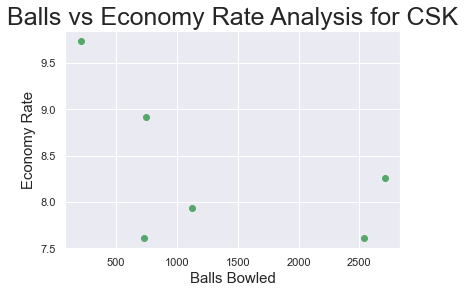

CSK Bowlers having best economy rate, bowling atleast 50 balls:
       bowler  Balls Bowled  Economy Rate
3  RA Jadeja          2541      7.605667
1  DL Chahar           728      7.607143
2  KV Sharma          1121      7.932203
0   DJ Bravo          2711      8.261896
5  SN Thakur           745      8.915436
4   S Curran           207      9.739130


([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

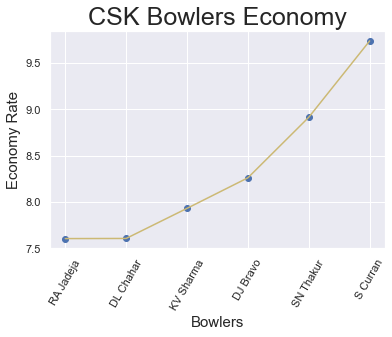

In [321]:
#let' consider ball limit to be 1000 in case of ballers
Ball_Limit= 50
bowling_runs_ = bowlers_.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls_ = bowlers_.groupby('bowler').count()
bowled_balls_ = bowling_balls_['ball'].reset_index(name='Balls Bowled')
bowler_stats_ = pd.merge(bowling_runs_, bowled_balls_,left_on='bowler',right_on='bowler',how='outer')

bowler_economy_rate_ = bowler_stats_.groupby(['bowler','Balls Bowled']).apply(lambda x:(((x['Runs Conceeded'])/(x['Balls Bowled']))*6)).reset_index(name='Economy Rate')

plt.scatter(bowler_economy_rate_['Balls Bowled'],bowler_economy_rate_['Economy Rate'],color='g')
plt.xlabel('Balls Bowled',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('Balls vs Economy Rate Analysis for CSK',size=25)
plt.show()


bowler_best_economy_rate_ = bowler_economy_rate_.sort_values(by='Economy Rate',ascending=True)
bowler_best_economy_rate_condition_ = bowler_best_economy_rate_[bowler_best_economy_rate_['Balls Bowled']>=Ball_Limit]
top_10_economy_ = bowler_best_economy_rate_condition_.loc[:,['bowler','Balls Bowled','Economy Rate']][0:10]

print('CSK Bowlers having best economy rate, bowling atleast {} balls:\n'.format(Ball_Limit),top_10_economy_)

plt.plot(top_10_economy_['bowler'],top_10_economy_['Economy Rate'],color='y')
plt.scatter(top_10_economy_['bowler'],top_10_economy_['Economy Rate'],color='b')
plt.xlabel('Bowlers',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('CSK Bowlers Economy',size=25)
plt.xticks(rotation=60)



# Conclusion: As seen in above analysis performance of both CSK and SRH in bowling is same but in case of SRH batting performance is slightly better thab CSK

# Hence, SRH would win

###############################################################################################################################
# Part 2: How many wides will be bowled in a match?
###############################################################################################################################

In [333]:
# SRH Bowlers data
bowlers_SRH= bowlers.groupby(['match_id','bowler']).apply(lambda x:np.sum(x['wide_runs'])).reset_index(name='wides')

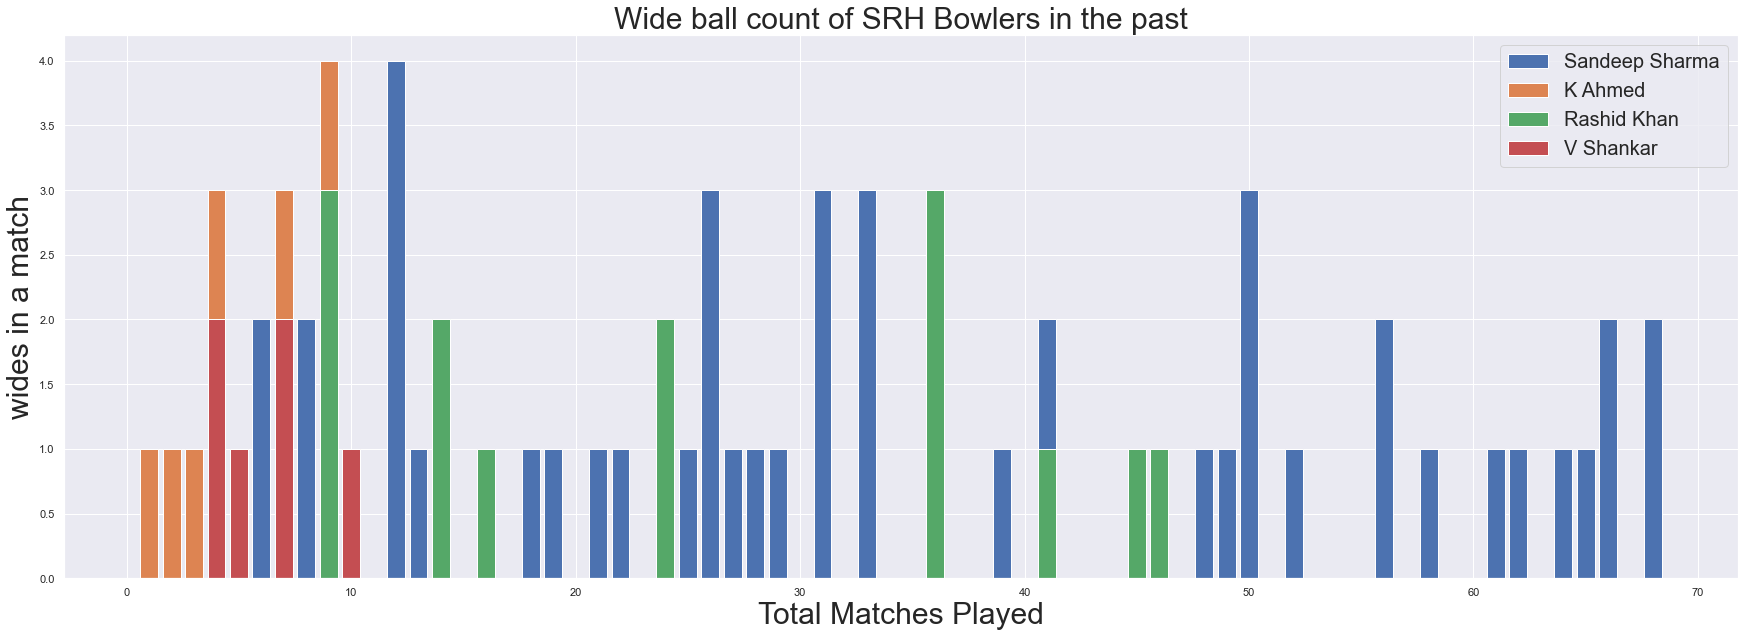

In [332]:
plt.figure(figsize=(30,10))
for name in bowlers_list:
    bowler_check = bowlers_SRH[bowlers_SRH.bowler==name]
    bowler_check.index = np.arange(1, len(bowler_check) + 1)
    x=bowler_check.index
    y=bowler_check.wides
    plt.bar(x,y)

plt.legend(bowlers_list,prop={'size':20})
plt.title("Wide ball count of SRH Bowlers in the past",fontsize=30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("wides in a match",fontsize=30)
plt.show()

In [342]:
bowlers_SRH.describe()

,match_id,wides
count,134.000000,134.000000
mean,4639.641791,0.634328
std,4723.836270,0.961992
min,1.000000,0.000000
25%,476.000000,0.000000
50%,617.000000,0.000000
75%,7950.000000,1.000000
max,11413.000000,4.000000


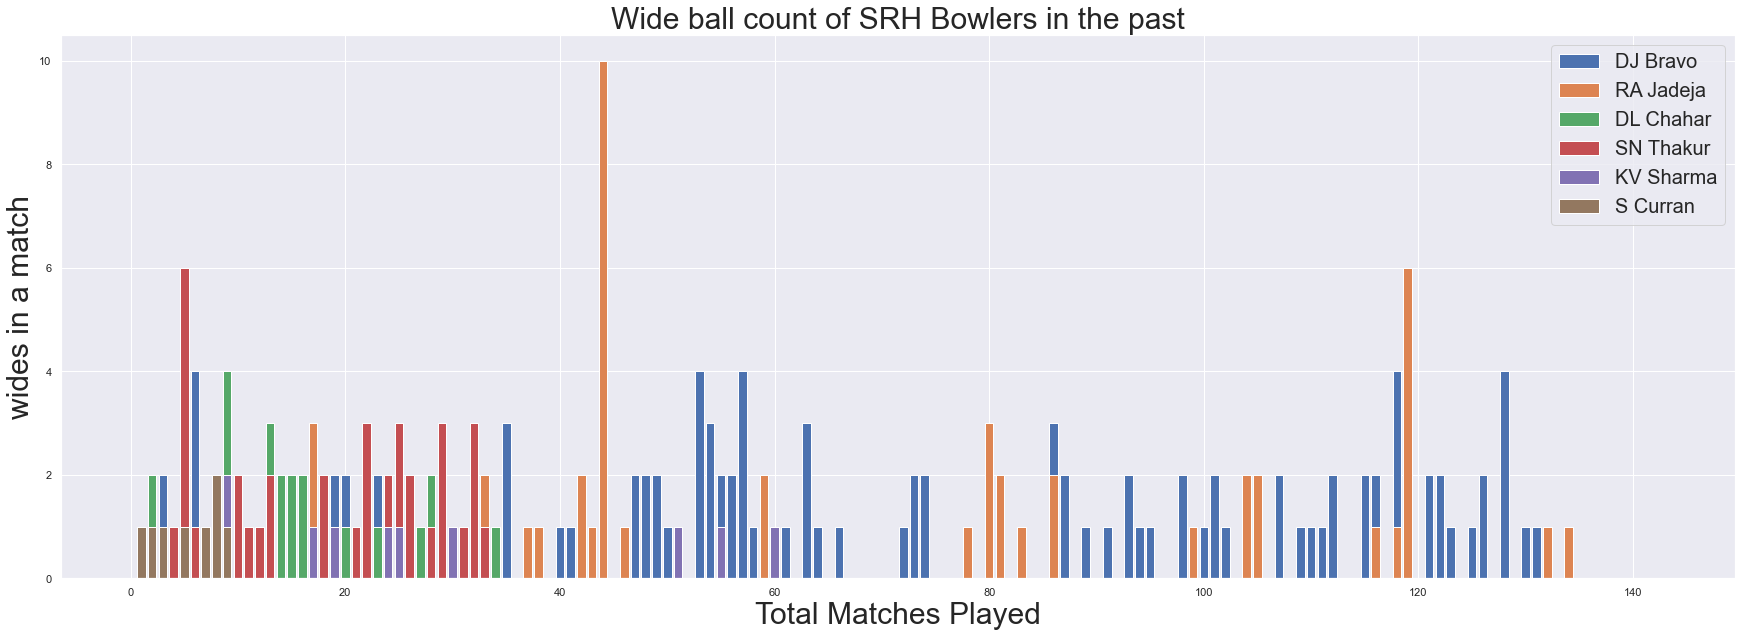

In [346]:

# SRH Bowlers data
bowlers_CSK = bowlers_.groupby(['match_id','bowler']).apply(lambda x:np.sum(x['wide_runs'])).reset_index(name='wides')
plt.figure(figsize=(30,10))
for name in bowlers_list_:
    bowler_check_ = bowlers_CSK[bowlers_CSK.bowler==name]
    bowler_check_.index = np.arange(1, len(bowler_check_) + 1)
    x=bowler_check_.index
    y=bowler_check_.wides
    plt.bar(x,y)

plt.legend(bowlers_list_,prop={'size':20})
plt.title("Wide ball count of SRH Bowlers in the past",fontsize=30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("wides in a match",fontsize=30)
plt.show()

In [348]:
bowlers_CSK.describe()

,match_id,wides
count,412.000000,412.000000
mean,3163.868932,0.667476
std,4372.479456,1.084557
min,2.000000,0.000000
25%,318.000000,0.000000
50%,517.500000,0.000000
75%,7917.000000,1.000000
max,11415.000000,10.000000


# Conclusion: Number of wides in a match would be more than 9

###############################################################################################################################
# Part 3: David Warner's Score
###############################################################################################################################

In [366]:
batsman_list_req1 = ['DA Warner']

batsman1 = players[players.batsman.isin(batsman_list_req1)]
batsman_run1 = batsman1.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')

print("Average Score DA Warner: ", batsman_run1["Runs"].describe())

Average Score DA Warner:  count    126.000000
mean      37.626984
std       30.513665
min        0.000000
25%        8.250000
50%       33.000000
75%       58.750000
max      126.000000
Name: Runs, dtype: float64


In [369]:
players_SC = players[((players.batting_team == "Sunrisers Hyderabad") & (players.bowling_team == "Chennai Super Kings")) | (players.bowling_team == "Sunrisers Hyderabad") & (players.batting_team == "Chennai Super Kings")]
bats_ = players_SC[players_SC.batsman.isin(batsman_list_req1)]
bats_run1_ = bats_.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
print("Average Score DA Warner Against CSK: ", bats_run1_["Runs"].describe())

Average Score DA Warner Against CSK:  count     6.000000
mean     52.333333
std      29.255199
min       0.000000
25%      51.500000
50%      56.000000
75%      60.500000
max      90.000000
Name: Runs, dtype: float64


## David Warner will score more than 40 today

##############################################################################################################################
# Part 4: How many wickets will CSK loos in the match today?
##############################################################################################################################

In [376]:
bowlers_list = ['Sandeep Sharma', 'K Ahmed', 'Rashid Khan', 'V Shankar']
bowling_wickets1 = players_SC[players_SC.bowler.isin(bowlers_list)]

bowling_tot1=bowling_wickets1.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count1=bowling_tot1.groupby('bowler').count().reset_index()




count    4.00000
mean     3.00000
std      2.44949
min      1.00000
25%      1.00000
50%      2.50000
75%      4.50000
max      6.00000
Name: Wickets, dtype: float64

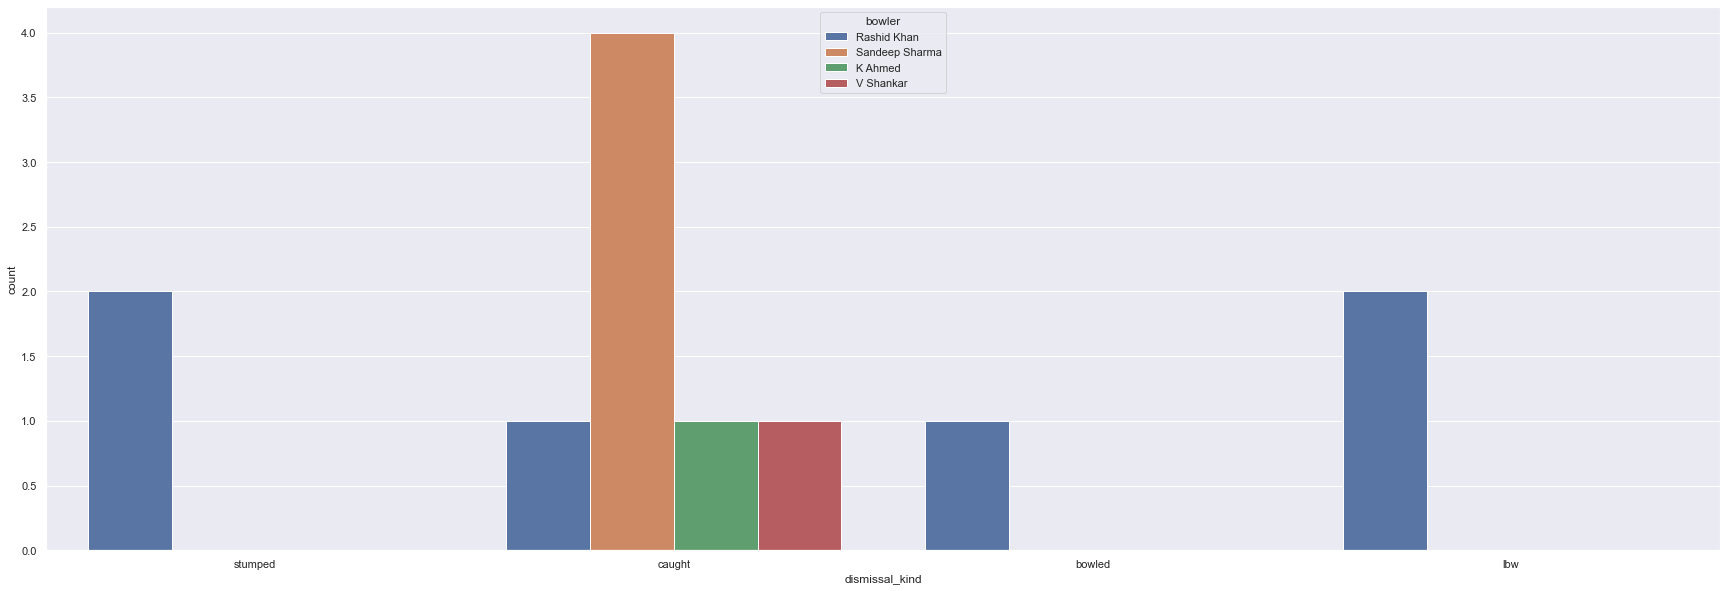

In [396]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'dismissal_kind', hue ='bowler', data = bowling_wickets1)

In [397]:
bowling_wick_count1['Wickets'].describe()

count    4.00000
mean     3.00000
std      2.44949
min      1.00000
25%      1.00000
50%      2.50000
75%      4.50000
max      6.00000
Name: Wickets, dtype: float64

## CSK wickets wold be 3-5

# Part 5: Runs scored

# Looking at the part 1 analysis the runs scored by both teams combined would not be more than 320
# pitch also allows you to score maximum 160 runs as per exprts